# Background
The dataset is from a fictional ecommerce company that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company has both a mobile app and a website. 
The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

# Objective 
To determine if if the company should direct its efforts on its mobile app experience or on its website.

# Dataset Description
Apart from customer identification information such as Email, Address, and their color Avatar, the dataset also consists of:
* Avg. Session Length: Average session of in-store style advice sessions in minutes.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

# Importing the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
ecomm = pd.read_csv('Ecommerce Customers.csv')
ecomm.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [17]:
ecomm.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis

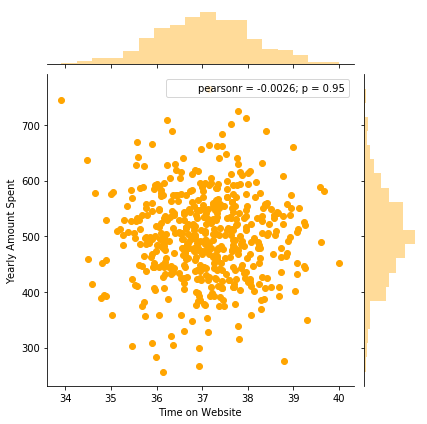

In [108]:
sns.jointplot(ecomm['Time on Website'], ecomm['Yearly Amount Spent'], color = 'orange')
plt.show()

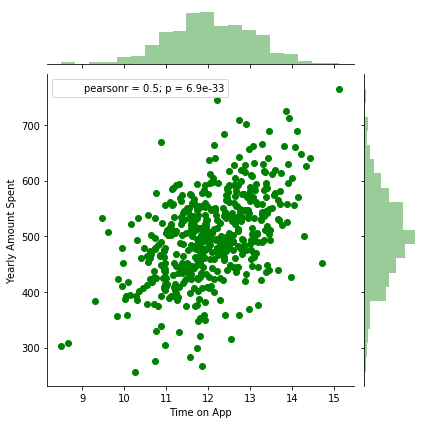

In [109]:
sns.jointplot(ecomm['Time on App'], ecomm['Yearly Amount Spent'], color = 'green')
plt.show()

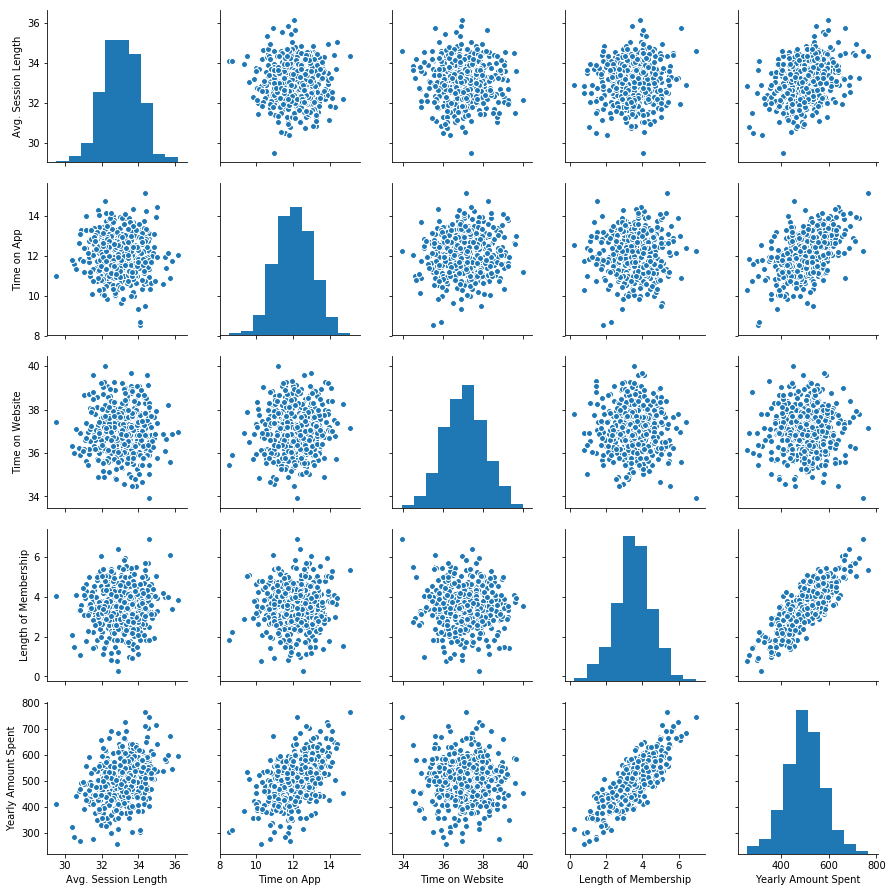

In [110]:
sns.pairplot(ecomm)
plt.show()

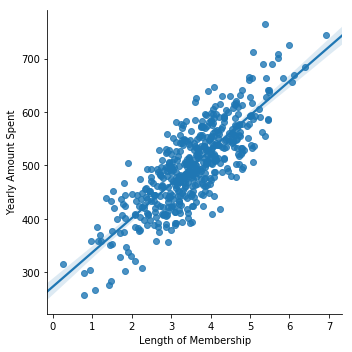

In [111]:
sns.lmplot('Length of Membership', 'Yearly Amount Spent', ecomm)
plt.show()

### Checking for multicollinearity

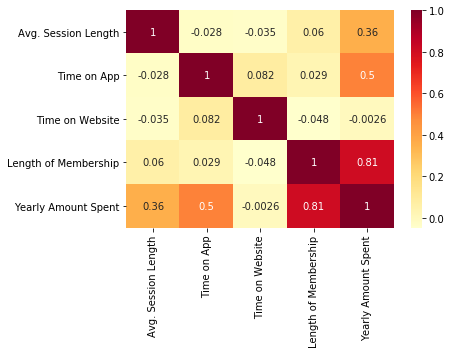

In [4]:
sns.heatmap(ecomm.corr(), cmap = 'YlOrRd', annot=True)
plt.show()

# Training the model

In [20]:
from sklearn.model_selection import train_test_split

In [27]:
X = ecomm[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = ecomm['Yearly Amount Spent']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
lm.intercept_

-1047.9327822502385

In [48]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [90]:
model = pd.DataFrame(data = lm.coef_, index = X.columns, columns = ['Coefficient'])
model

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Predictions

In [51]:
predictions = lm.predict(X_test)

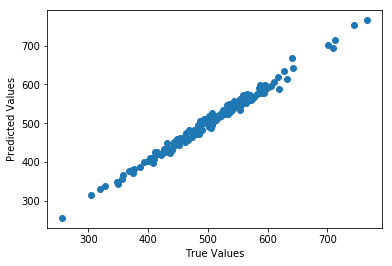

In [113]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Evaluating the Model

In [54]:
from sklearn import metrics

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',  np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430817
MSE: 79.81305165097437
RMSE: 8.93381506697863


In [100]:
print('R-Squared:', metrics.r2_score(y_test, predictions))

R-Squared: 0.9890046246741234


# Residuals

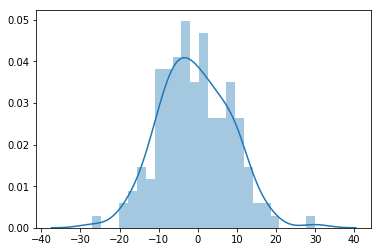

In [114]:
sns.distplot([y_test-predictions], bins = 25)
plt.show()

#### Residuals are normally distributed

# Conclusion

In [91]:
model

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In conclusion, the platform that is bringing higher revenues is its mobile app. On an average, a one minute increase in app usage is associated with an increase in the customers' yearly amount spent by $38.6. 

However other leading indicators that increases the yearly amount spent are length of membership and average session length. 
* A one minute increase in average session length is associated with an increase in the yearly amount spent by a customer by $26.

* Furthermore, a one year increase in the length of the membership is associated with an increase in yearly amount spent by a customer by $61.

However, a one minute increase in the time spent on the website is associated with an increase in the yearly amount spent by the customers by only 19 cents. So it is recommended that the company investigate the causes for such a poor performance and take remedial measures as necessary. 